In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve

In [2]:
# loading the data into a dataframe
data = pd.read_csv("heart_disease_data.csv")

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
data.shape

(303, 14)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
data['fbs'].unique()

array([1, 0], dtype=int64)

In [7]:
data['restecg'].unique()

array([0, 1, 2], dtype=int64)

In [8]:
data['target'].unique()

array([1, 0], dtype=int64)

In [9]:
data['exang'].unique()

array([0, 1], dtype=int64)

In [10]:
# getting insights of the data
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Exploratory Data Analysis

<Axes: xlabel='sex', ylabel='count'>

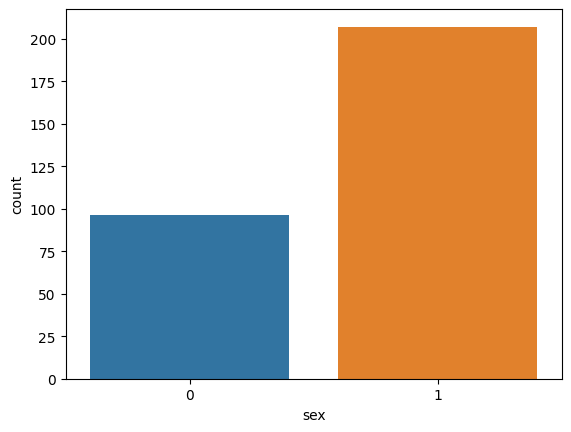

In [11]:
# male --> 1
# female --> 0
sns.countplot(x = 'sex', data = data)

<Axes: xlabel='age', ylabel='count'>

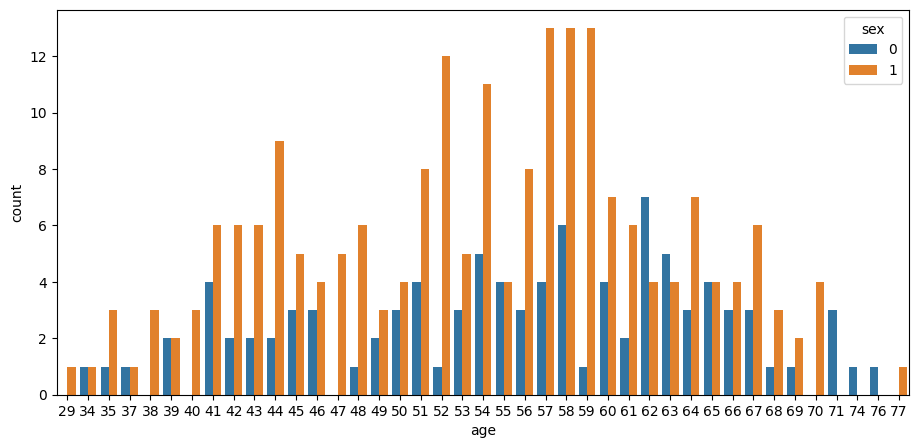

In [12]:
# male --> 1
# female --> 0
plt.figure(figsize = (11,5))
sns.countplot(x = 'age', hue = data['sex'], data = data)

<Axes: title={'center': 'Chest Pain Type'}, xlabel='cp', ylabel='count'>

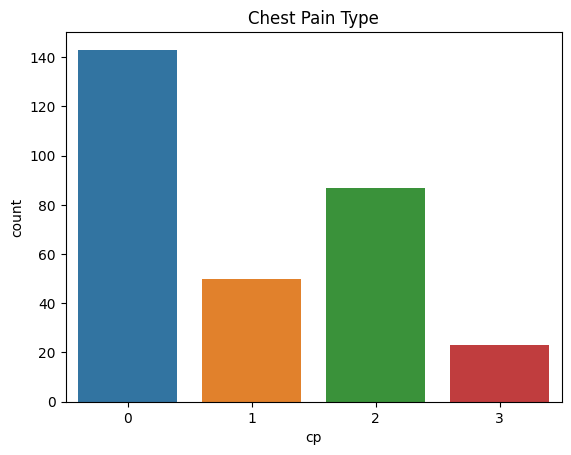

In [13]:
plt.title("Chest Pain Type")
sns.countplot(x = 'cp', data = data)

<Axes: title={'center': 'fasting blood sugar'}, xlabel='fbs', ylabel='count'>

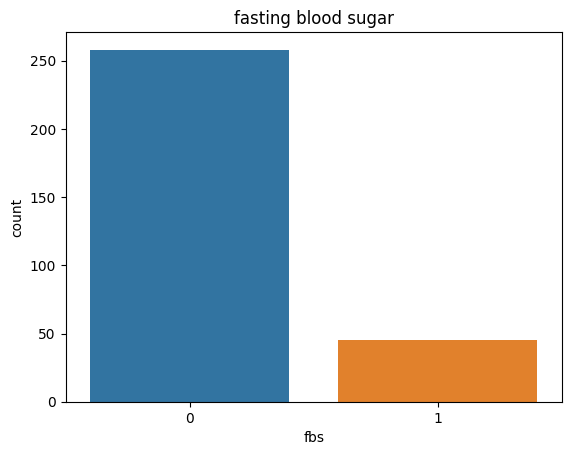

In [14]:
plt.title("fasting blood sugar")
sns.countplot(x = "fbs", data = data)

<Axes: title={'center': 'resting electrocardiographic results'}, xlabel='restecg', ylabel='count'>

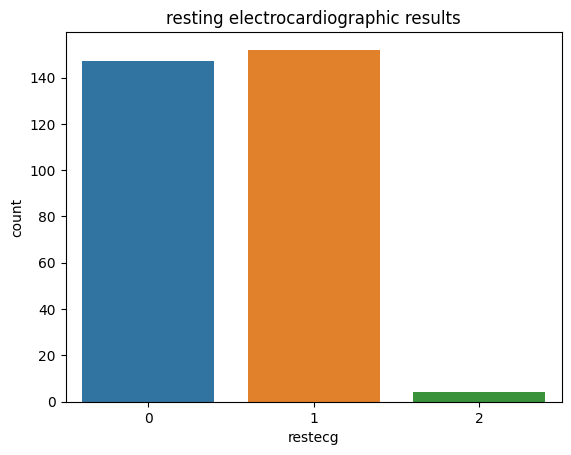

In [15]:
plt.title("resting electrocardiographic results")
sns.countplot(x = 'restecg', data = data)

<Axes: title={'center': 'exercise induced angina'}, xlabel='exang', ylabel='count'>

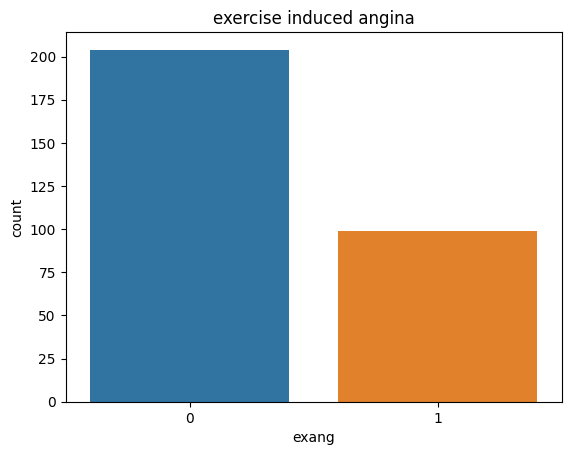

In [16]:
plt.title("exercise induced angina")
sns.countplot(x = 'exang', data = data)

<Axes: title={'center': 'the slope of the peak exercise'}, xlabel='slope', ylabel='count'>

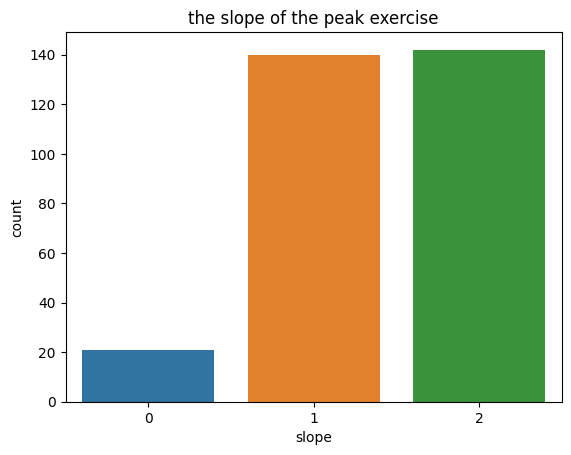

In [17]:
plt.title("the slope of the peak exercise")
sns.countplot(x = 'slope', data = data)

<Axes: title={'center': 'Number of Major Vessels'}, xlabel='ca', ylabel='count'>

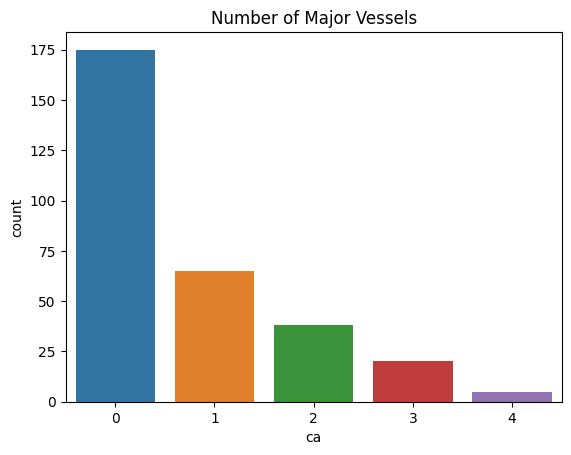

In [18]:
plt.title("Number of Major Vessels")
sns.countplot(x = 'ca', data = data)

<Axes: title={'center': 'Number of thal'}, xlabel='thal', ylabel='count'>

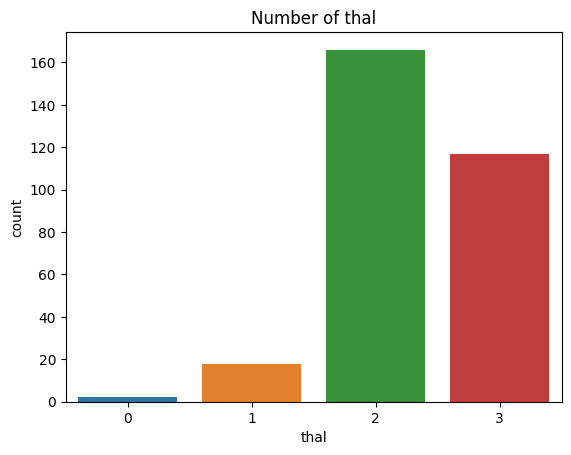

In [19]:
plt.title('Number of thal')
sns.countplot(x = 'thal', data = data)

<Axes: title={'center': 'Heart disease status'}, xlabel='target', ylabel='count'>

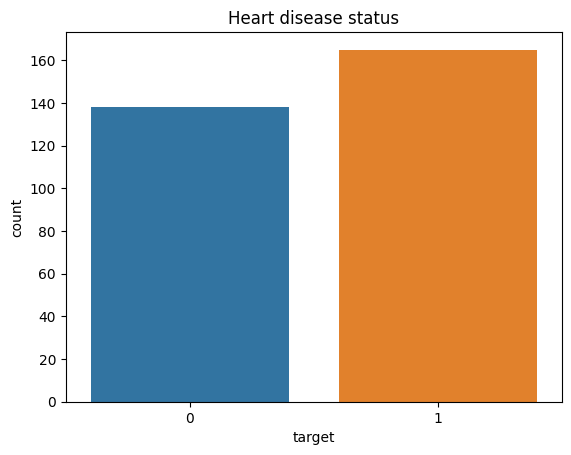

In [20]:
# no disease --> 0
# heart disease --> 1
plt.title("Heart disease status")
sns.countplot(x = 'target', data= data)

{'whiskers': [<matplotlib.lines.Line2D at 0x1b7060c3a90>,
 'caps': [<matplotlib.lines.Line2D at 0x1b705ef5910>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b706108510>],
 'medians': [<matplotlib.lines.Line2D at 0x1b70611b650>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b7060cf590>],
 'means': []}

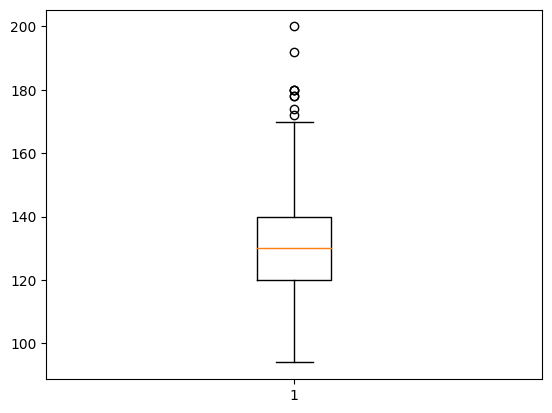

In [21]:
plt.boxplot(data['trestbps'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1b7077b3090>,
 'caps': [<matplotlib.lines.Line2D at 0x1b7077b86d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b70615a990>],
 'medians': [<matplotlib.lines.Line2D at 0x1b7077b9d10>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b7063f2690>],
 'means': []}

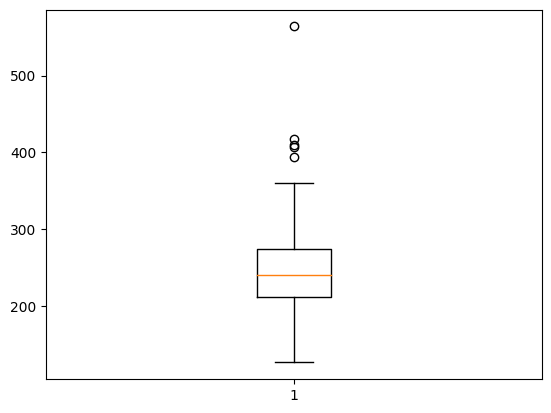

In [22]:
plt.boxplot(data['chol'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1b70781a650>,
 'caps': [<matplotlib.lines.Line2D at 0x1b70781bf10>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b707819990>],
 'medians': [<matplotlib.lines.Line2D at 0x1b707825690>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b70781b910>],
 'means': []}

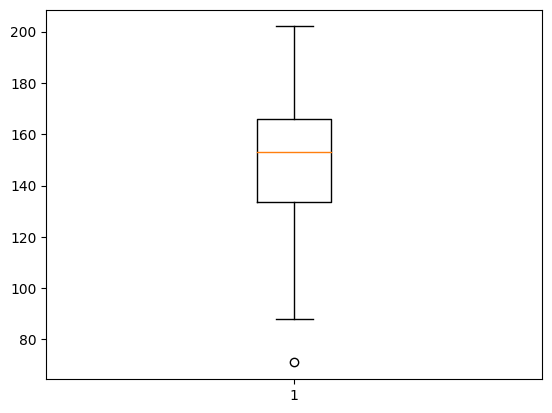

In [23]:
plt.boxplot(data['thalach'])

<Axes: >

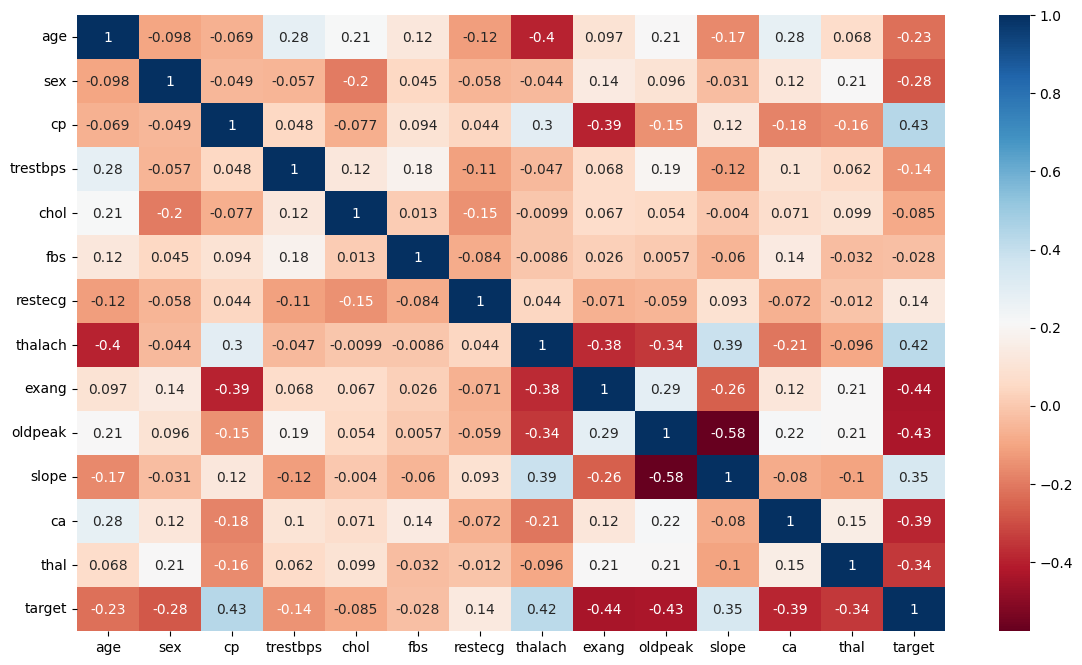

In [24]:
# heatmap 
plt.figure(figsize = (14,8))
sns.heatmap(data.corr(), annot = True, cmap = 'RdBu')

## Data Preprocessing

### Feature seperation

In [25]:
X = data.drop('target', axis = 1)  #independent variable
Y = data['target']                 #dependent variable

### Splitting the dataset

In [37]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify = Y, random_state = 0)

In [38]:
print(X_train.shape, X_test.shape)

(242, 13) (61, 13)


In [39]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [40]:
X_train

array([[ 0.1762246 ,  0.63794729, -0.95894245, ..., -2.22991675,
        -0.71743331,  1.09984435],
       [ 0.39834103,  0.63794729, -0.95894245, ..., -0.61905151,
         2.17621437,  1.09984435],
       [-0.49012468, -1.56752763,  0.96690048, ..., -0.61905151,
        -0.71743331, -0.5035432 ],
       ...,
       [ 1.17574852, -1.56752763, -0.95894245, ..., -0.61905151,
         2.17621437,  1.09984435],
       [-0.15695004,  0.63794729, -0.95894245, ..., -0.61905151,
         1.21166515,  1.09984435],
       [ 0.95363209, -1.56752763,  0.96690048, ...,  0.99181372,
        -0.71743331, -0.5035432 ]])

In [41]:
X_test

array([[-1.60070681e+00,  6.37947290e-01,  1.92982194e+00,
         4.76031696e-01, -8.83864940e-01, -4.51641561e-01,
         8.57492926e-01,  1.23670598e+00,  1.47790748e+00,
         3.41729166e-01,  9.91813716e-01, -7.17433310e-01,
         1.09984435e+00],
       [-1.04541574e+00, -1.56752763e+00,  3.97901431e-03,
        -9.68159939e-02, -1.97422978e-01, -4.51641561e-01,
        -1.02899151e+00,  1.10723971e+00, -6.76632341e-01,
        -3.64340915e-01, -6.19051514e-01, -7.17433310e-01,
        -5.03543196e-01],
       [ 1.06469031e+00,  6.37947290e-01,  1.92982194e+00,
        -1.24251137e+00, -6.48513410e-01, -4.51641561e-01,
        -1.02899151e+00, -2.30578346e-01,  1.47790748e+00,
         6.94764207e-01, -6.19051514e-01, -7.17433310e-01,
        -5.03543196e-01],
       [ 1.06469031e+00, -1.56752763e+00,  9.66900478e-01,
         4.76031696e-01,  1.35197459e+00, -4.51641561e-01,
         8.57492926e-01, -7.05287981e-01, -6.76632341e-01,
        -7.17375955e-01,  9.91813716e

## Model Implementation

### Logistic Regression

In [42]:
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train, Y_train)

LogisticRegression()

In [43]:
# training data accuracy 
log_train_pred = log_reg_model.predict(X_train)
log_train_acc = accuracy_score(log_train_pred, Y_train)
print("Training Data accuracy : ", log_train_acc)

Training Data accuracy :  0.8347107438016529


In [44]:
# test data accuracy 
log_test_pred = log_reg_model.predict(X_test)
log_test_acc = accuracy_score(log_test_pred, Y_test)
print("Testing Data accuracy : ", log_test_acc)

Testing Data accuracy :  0.8524590163934426


In [49]:
print("Confusion Matrix : ")
log_conf_matrix = confusion_matrix(Y_test, log_test_pred)
print(log_conf_matrix)
print("Logistic regression accuracy : ")
print(classification_report(Y_test, log_test_pred))

Confusion Matrix
[[22  6]
 [ 3 30]]
Logistic regression accuracy : 
              precision    recall  f1-score   support

           0       0.88      0.79      0.83        28
           1       0.83      0.91      0.87        33

    accuracy                           0.85        61
   macro avg       0.86      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



### KNN

In [50]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, Y_train)

KNeighborsClassifier()

In [51]:
# training data accuracy 
knn_train_pred = knn_model.predict(X_train)
knn_train_acc = accuracy_score(knn_train_pred, Y_train)
print("Training Data accuracy : ", knn_train_acc)

Training Data accuracy :  0.8801652892561983


In [53]:
# testing data accuracy 
knn_test_pred = knn_model.predict(X_test)
knn_test_acc = accuracy_score(knn_test_pred, Y_test)
print("Testining Data accuracy : ", knn_test_acc)

Testining Data accuracy :  0.8032786885245902


In [54]:
print("Confusion Matrix : ")
knn_conf_matrix = confusion_matrix(Y_test, knn_test_pred)
print(knn_conf_matrix)
print("KNN accuracy : ")
print(classification_report(Y_test, knn_test_pred))

Confusion Matrix : 
[[20  8]
 [ 4 29]]
KNN accuracy : 
              precision    recall  f1-score   support

           0       0.83      0.71      0.77        28
           1       0.78      0.88      0.83        33

    accuracy                           0.80        61
   macro avg       0.81      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61



### Support Vector Classifier

In [55]:
svc_model = SVC(kernel = 'rbf')
svc_model.fit(X_train, Y_train)

SVC()

In [56]:
# training data accuracy 
svc_train_pred = svc_model.predict(X_train)
svc_train_acc = accuracy_score(svc_train_pred, Y_train)
print("Training Data accuracy : ", svc_train_acc)

Training Data accuracy :  0.9132231404958677


In [60]:
# testing data accuracy 
svc_test_pred = svc_model.predict(X_test)
svc_test_acc = accuracy_score(svc_test_pred, Y_test)
print("Testining Data accuracy : ", svc_test_acc)

Testining Data accuracy :  0.8524590163934426


In [61]:
print("Confusion Matrix : ")
svc_conf_matrix = confusion_matrix(Y_test, svc_test_pred)
print(svc_conf_matrix)
print("SVC accuracy : ")
print(classification_report(Y_test, svc_test_pred))

Confusion Matrix : 
[[23  5]
 [ 4 29]]
SVC accuracy : 
              precision    recall  f1-score   support

           0       0.85      0.82      0.84        28
           1       0.85      0.88      0.87        33

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



### Random Forest Classifier

In [136]:
rf_model = RandomForestClassifier(n_estimators = 20)
rf_model.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=20)

In [137]:
# training data accuracy 
rf_train_pred = rf_model.predict(X_train)
rf_train_acc = accuracy_score(Y_train, rf_train_pred)
print("Training Data accuracy : ", rf_train_acc)

Training Data accuracy :  0.9958677685950413


In [138]:
# testing data accuracy 
rf_test_pred = rf_model.predict(X_test)
rf_test_acc = accuracy_score(rf_test_pred, Y_test)
print("Testining Data accuracy : ", rf_test_acc)

Testining Data accuracy :  0.8524590163934426


In [139]:
print("Confusion Matrix : ")
rf_conf_matrix = confusion_matrix(Y_test, rf_test_pred)
print(rf_conf_matrix)
print("Random Forest Accuracy accuracy : ")
print(classification_report(Y_test, rf_test_pred))

Confusion Matrix : 
[[24  4]
 [ 5 28]]
Random Forest Accuracy accuracy : 
              precision    recall  f1-score   support

           0       0.83      0.86      0.84        28
           1       0.88      0.85      0.86        33

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61

